In [79]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("world-data-2023.csv",sep=",") 
# print(df.head())
# print(df.info())
# print(df.describe())
# print(df.describe(include='O'))


In [38]:
print(df.head())

       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...   

In [67]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density(P/Km2)                             195 non-null    int32  
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [102]:
if type(df['Density(P/Km2)'][0]) is str:
    df['Density(P/Km2)'] = df['Density(P/Km2)'].str.replace(',', '').astype(int)

if type(df['Land Area(Km2)'][0]) is str:
    df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(',', '').astype(float)

if type(df['Armed Forces size'][0]) is str:
    df['Armed Forces size'] = df['Armed Forces size'].str.replace(',', '').astype(float)

if type(df['Co2-Emissions'][0]) is str:
    df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '').astype(float)

if type(df['CPI'][0]) is str:
    df['CPI'] = df['CPI'].str.replace(',', '').astype(float)

if type(f['CPI Change (%)'][0]) is str:
    df['CPI Change (%)'] = df['CPI Change (%)'].str.replace(',', '').astype(float)

if type(df['Fertility Rate'][0]) is str:
    df['Fertility Rate'] = df['Fertility Rate'].str.replace(',', '').astype(float)

if type(df['Forested Area (%)'][0]) is str:
    df['Forested Area (%)'] = df['Forested Area (%)'].str.replace('%', '').astype(float)

if type(df['GDP'][0]) is str:
    df['GDP'] = df['GDP'].replace('$', '').str.replace(',', '').astype(float)

if type(df['Gross primary education enrollment (%)'][0]) is str:
    df['Gross primary education enrollment (%)'] = df['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)

if type(df['Gross tertiary education enrollment (%)'][0]) is str:
    df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)

if type(df['Minimum wage'][0]) is str:
    df['Minimum wage'] = df['Minimum wage'].str.replace('$', '').astype(float)





NameError: name 'f' is not defined

In [100]:
print(df['Minimum wage'][0])
print(type(df['Minimum wage'][0]))

$0.43 
<class 'str'>


In [34]:
df.drop(['moon_phase','moonset','moonrise','sunset','last_updated','sunrise', 'timezone','country','location_name','condition_text',"moonrise","wind_direction"], axis=1, inplace=True)

<Axes: >

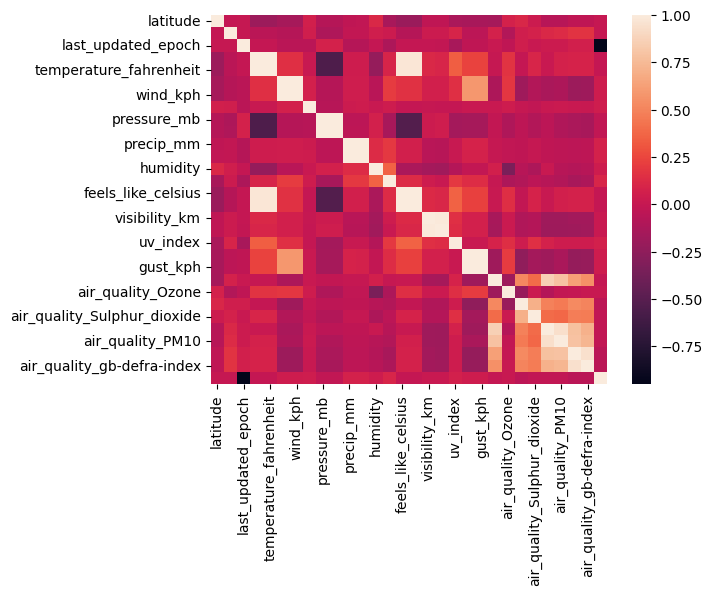

In [36]:
correlacao=df.corr()
sns.heatmap(df.corr())